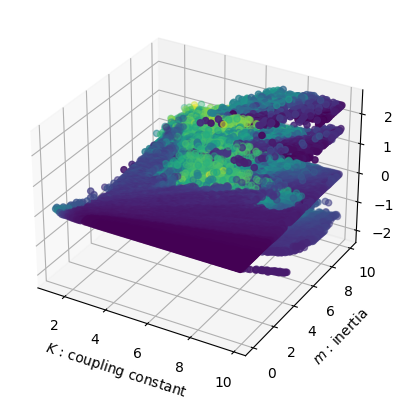

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
df = pd.read_excel('test 230620.xlsm',index_col=[0,1])
# df_Km = df.reset_index(['K','m'])
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# origin = 'lower'
# CS = plt.contourf(KK,MM,df['rMM'].unstack().T, 20, cmap=plt.cm.viridis, origin=origin)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.colorbar()
Ks = df.reset_index().K
ms = df.reset_index().m
Ss_c0 = df.reset_index()['S c0']
Ss_c1 = df.reset_index()['S c1']
Ss_c2 = df.reset_index()['S c2']
Ss_c3 = df.reset_index()['S c3']
Ss_c4 = df.reset_index()['S c4']
Ss_c5 = df.reset_index()['S c5']

So_c0 = df.reset_index()['S c0 omega']
So_c1 = df.reset_index()['S c1 omega']
So_c2 = df.reset_index()['S c2 omega']
So_c3 = df.reset_index()['S c3 omega']
So_c4 = df.reset_index()['S c4 omega']
So_c5 = df.reset_index()['S c5 omega']

rMM = df.reset_index()['rMM']


# plt.subplot(projection='3d')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Ks,ms,So_c0,c=rMM)
ax.scatter(Ks,ms,So_c1,c=rMM)
ax.scatter(Ks,ms,So_c2,c=rMM)
ax.scatter(Ks,ms,So_c3,c=rMM)
ax.scatter(Ks,ms,So_c4,c=rMM)
ax.scatter(Ks,ms,So_c5,c=rMM)

ax.set_xlabel('$K$ : coupling constant')
ax.set_ylabel('$m$ : inertia')
ax.set_zlabel('cluster phase velocity')
# plt.zlim(-0.)
# plt.scatter(Ks,ms,Ss,Ss)
plt.show()



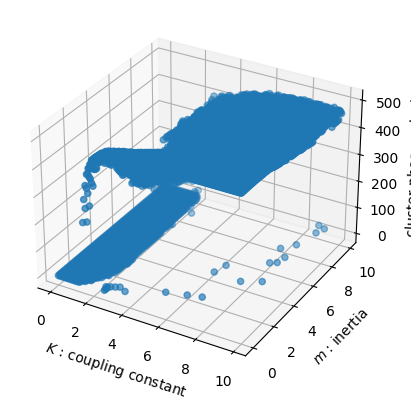

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import C_rsmso,cluster_os
from TO_sim.To_Draw import Draw_avg_vel_r

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

from matplotlib.colors import LightSource

df = pd.read_excel('test 230620.xlsm',index_col=[0,1])
# df_Km = df.reset_index(['K','m'])
KK = df.index.to_frame().K.unstack().to_numpy().T
MM = df.index.to_frame().m.unstack().to_numpy().T
# origin = 'lower'
# CS = plt.contourf(KK,MM,df['rMM'].unstack().T, 20, cmap=plt.cm.viridis, origin=origin)
# CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.colorbar()
Ks = df.reset_index().K
ms = df.reset_index().m
Ss_c0 = df.reset_index()['S c0']
Ss_c1 = df.reset_index()['S c1']
Ss_c2 = df.reset_index()['S c2']
Ss_c3 = df.reset_index()['S c3']
Ss_c4 = df.reset_index()['S c4']
Ss_c5 = df.reset_index()['S c5']

sm = np.zeros_like(Ss_c0)
for i in [Ss_c0,Ss_c1,Ss_c2,Ss_c3,Ss_c4,Ss_c5]:
    sm+=i.fillna(0)
# sm = Ss_c0 +Ss_c1+Ss_c2+Ss_c3+Ss_c4+Ss_c5


So_c0 = df.reset_index()['S c0 omega']
So_c1 = df.reset_index()['S c1 omega']
So_c2 = df.reset_index()['S c2 omega']
So_c3 = df.reset_index()['S c3 omega']
So_c4 = df.reset_index()['S c4 omega']
So_c5 = df.reset_index()['S c5 omega']


rMM = df.reset_index()['rMM']

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
# plt.subplot(projection='3d')
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
rgb = ls.shade(z, vert_exag=0.1, blend_mode='soft')
# ax.scatter(Ks,ms,So_c0,c=rMM,s=Ss_c0*0.1)
# ax.scatter(Ks,ms,So_c1,c=rMM,s=Ss_c1*0.1)
# ax.scatter(Ks,ms,So_c2,c=rMM,s=Ss_c2*0.1)
# ax.scatter(Ks,ms,So_c3,c=rMM,s=Ss_c3*0.1)
# ax.scatter(Ks,ms,So_c4,c=rMM,s=Ss_c4*0.1)
# ax.scatter(Ks,ms,So_c5,c=rMM,s=Ss_c5*0.1)
ax.scatter(Ks,ms,sm)
ax.set_xlabel('$K$ : coupling constant')
ax.set_ylabel('$m$ : inertia')
ax.set_zlabel('cluster phase velocity')
# plt.zlim(-0.)
# plt.scatter(Ks,ms,Ss,Ss)
plt.show()



In [33]:
df = pd.read_excel('test 230620.xlsm',index_col=[0,1])


In [34]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(KK,MM,df['S c1 omega'].unstack().T, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(KK,MM,df['S c1 omega'].unstack().T, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(KK,MM,df['S c1 omega'].unstack().T, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(KK,MM,df['S c1 omega'].unstack().T, zdir='y', offset=40, cmap='coolwarm')

# ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
#        xlabel='X', ylabel='Y', zlabel='Z')

# ax.scatter(Ks,ms,sm)
ax.set_xlabel('$K$ : coupling constant')
ax.set_ylabel('$m$ : inertia')
ax.set_zlabel('cluster phase velocity')
# plt.zlim(-0.)
# plt.scatter(Ks,ms,Ss,Ss)
plt.show()



ValueError: not enough values to unpack (expected 3, got 0)

<Figure size 640x480 with 1 Axes>

In [38]:
df['S c1 omega'].unstack().T.shape

(100, 100)

ValueError: can only convert an array of size 1 to a Python scalar

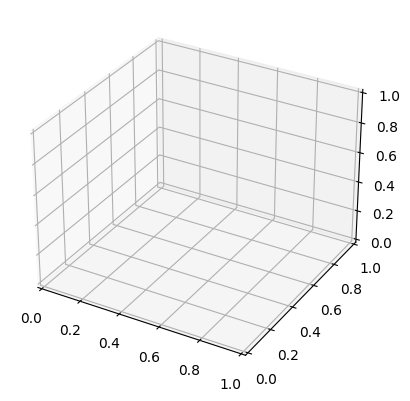

In [40]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data


x, y, z = KK,MM,df['S c0'].unstack().T.fillna(0)

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [36]:
x.shape

(45, 45)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

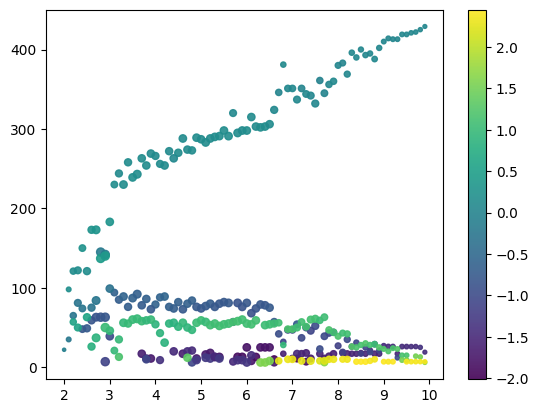

In [133]:
m_idx = 99
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == ms[m_idx]]
Ks = df_m.K
rs = df_m.r
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.iloc[:,5:15]
cluster_o = df_m.iloc[:,15:25]

plt.scatter(np.ones((10,100))*Ks.to_numpy(),cluster_s.to_numpy().T,alpha=0.9,
            c=(cluster_o.to_numpy().T),s=50*np.ones((10,100))*rMM)
plt.colorbar()

3740     21.0
3940    383.0
4540      6.0
4740     11.0
5340    430.0
9040    473.0
9340    476.0
9640    474.0
Name: c1, dtype: float64

1


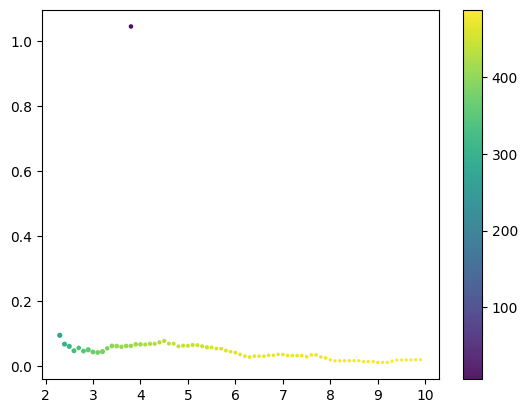

In [153]:
m_idx = 31
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == ms[m_idx]]
Ks = df_m.K
rs = df_m.r
rMM= df_m.rMM.to_numpy()
cluster_s = df_m.iloc[:,5:15]
cluster_o = df_m.iloc[:,15:25]
print(len(cluster_s['c1'].dropna()))
plt.scatter(np.ones((10,100))*Ks.to_numpy(),(cluster_o.to_numpy().T),c=cluster_s.to_numpy().T,alpha=0.9,
            s=50*np.ones((10,100))*rMM)
plt.colorbar()

In [107]:
cluster_s.shape

(100, 10)

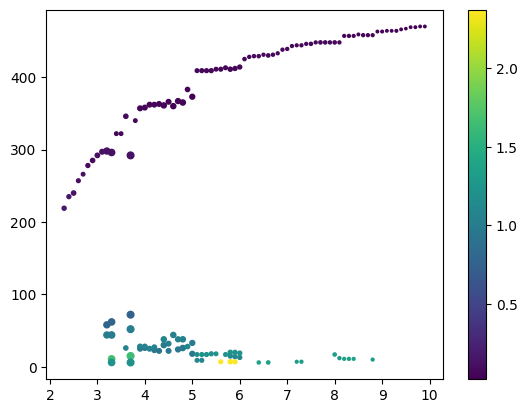

In [ ]:
m_idx = 1
re_df = df.reset_index()
re_df[re_df.loc(1,'m')]
plt.scatter()